In [1]:
train_dir = 'D:/Documentos/Estudio/Maestria/1-Periodo/Aprendizaje_Computacional/Modelopropio/Database/Lung Segmentation Data/Lung Segmentation Data/Train' 
val_dir = 'D:/Documentos/Estudio/Maestria/1-Periodo/Aprendizaje_Computacional/Modelopropio/Database/Lung Segmentation Data/Lung Segmentation Data/Val' 
test_dir = 'D:/Documentos/Estudio/Maestria/1-Periodo/Aprendizaje_Computacional/Modelopropio/Database/Lung Segmentation Data/Lung Segmentation Data/Test'

In [2]:
#ELEGIMOS LOS PARAMETROS
from keras.preprocessing.image import ImageDataGenerator
ih, iw = 256,256 #tamano de la imagen
input_shape = (ih, iw, 3) #forma de la imagen: alto ancho y numero de canales

num_class = 2 #cuantas clases 
#epochs = 15 #cuantas veces entrenar. En cada epoch hace una mejora en los parametros

batch_size = 32 #batch para hacer cada entrenamiento. Lee 50 'batch_size' imagenes antes de actualizar los parametros. Las carga a memoria
num_train = 21715 #numero de imagenes en train
num_test = 6788 #numero de imagenes en test
num_val=5417

epoch_steps = num_train // batch_size 
test_steps = num_test // batch_size


Using TensorFlow backend.


In [3]:
#LEEMOS LAS IMÁGENES 

img_height, img_width=ih, iw

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical') # set as training data

validation_generator = train_datagen.flow_from_directory(
    val_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical') # set as validation data

test_generator = train_datagen.flow_from_directory(
    test_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical') # set as validation data

Found 14507 images belonging to 2 classes.
Found 3615 images belonging to 2 classes.
Found 4535 images belonging to 2 classes.


In [4]:
train=train_generator
val=validation_generator
test=test_generator

In [18]:
from keras.applications import vgg16 
from keras.models import Model 
import keras 


vgg = vgg16.VGG16(include_top=False, weights='imagenet',  
                                     input_shape=input_shape) 

# we have removed the final part of the classifier pertaining to the VGG-16 model 
#since we will be building our own classifier and leveraging VGG as a feature extractor
output = vgg.layers[-1].output 
output = keras.layers.Flatten()(output) 
vgg_model = Model(vgg.input, output) 

 
vgg_model.trainable = False
set_trainable = False
 
for layer in vgg_model.layers: 
    if layer.name in ['']: 
        set_trainable = True 
    if set_trainable: 
        layer.trainable = True 
    else: 
        layer.trainable = False 

In [19]:
import pandas as pd 
pd.set_option('max_colwidth', -1)

layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers] 
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

C:\Users\elium\.conda\envs\tfGPU\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x000002BAE8A8F408>,input_5,False
1,<keras.layers.convolutional.Conv2D object at 0x000002BAE8B3CF48>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x000002BAE881C5C8>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x000002BAE8C3C8C8>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x000002BAE8C3C3C8>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x000002BAE8C471C8>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x000002BAE8C52D48>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x000002BAE8C52D08>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x000002BAE8C5A248>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x000002BAE8C61C88>,block3_conv3,False


In [20]:
print(vgg_model.summary())

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0   

In [13]:
from os import listdir
from os.path import isfile,isdir, join
import numpy

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import layers, models
from keras.models import Sequential
from keras.layers import Dense,Conv2D, Dropout,Activation,MaxPooling2D,Flatten
from keras.optimizers import RMSprop 
from sklearn.model_selection import train_test_split

In [14]:
from keras import backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [39]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer 
from keras.models import Sequential 
from keras import optimizers  
import tensorflow as tf

# build model architecture 
model = Sequential() 

model.add(vgg_model) 
model.add(Dense(64, activation='relu', input_dim=input_shape)) 
model.add(Dropout(0.25)) 
model.add(Dense(num_class, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9), 
      loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True), 
      metrics=['accuracy',f1_m,precision_m, recall_m])

In [40]:
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_5 (Model)              (None, 32768)             14714688  
_________________________________________________________________
dense_16 (Dense)             (None, 64)                2097216   
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 130       
Total params: 16,812,034
Trainable params: 2,097,346
Non-trainable params: 14,714,688
_________________________________________________________________
None


In [41]:
history = model.fit_generator(train, steps_per_epoch=64, 
                              epochs=15,  
                              validation_data=val,   
                              validation_steps=50,  
                              verbose=1)

Epoch 1/15
64/64 [==============================] - 17s 264ms/step - loss: 0.6862 - accuracy: 0.5601 - f1_m: 0.1430 - precision_m: 0.5581 - recall_m: 0.0845 - val_loss: 0.6990 - val_accuracy: 0.5494 - val_f1_m: 0.2399 - val_precision_m: 0.8164 - val_recall_m: 0.1437
Epoch 2/15
64/64 [==============================] - 16s 257ms/step - loss: 0.6652 - accuracy: 0.6416 - f1_m: 0.5102 - precision_m: 0.6752 - recall_m: 0.4248 - val_loss: 0.6380 - val_accuracy: 0.7675 - val_f1_m: 0.7093 - val_precision_m: 0.7650 - val_recall_m: 0.6644
Epoch 3/15
64/64 [==============================] - 16s 257ms/step - loss: 0.6478 - accuracy: 0.7090 - f1_m: 0.6541 - precision_m: 0.6839 - recall_m: 0.6323 - val_loss: 0.6415 - val_accuracy: 0.7542 - val_f1_m: 0.7307 - val_precision_m: 0.7600 - val_recall_m: 0.7054
Epoch 4/15
64/64 [==============================] - 17s 258ms/step - loss: 0.6287 - accuracy: 0.7495 - f1_m: 0.7127 - precision_m: 0.7247 - recall_m: 0.7051 - val_loss: 0.6237 - val_accuracy: 0.7962 

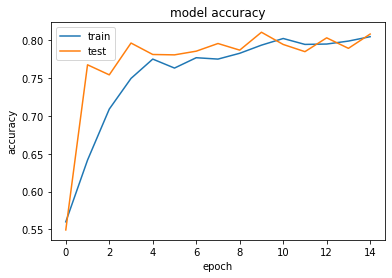

In [42]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

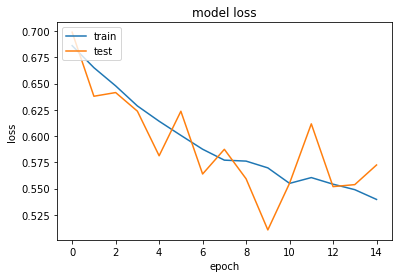

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

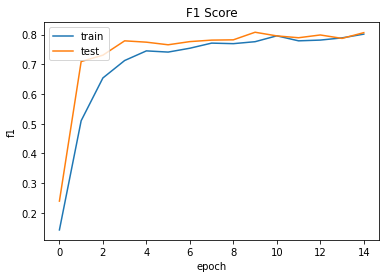

In [44]:
plt.plot(history.history['f1_m'])
plt.plot(history.history['val_f1_m'])
plt.title('F1 Score')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

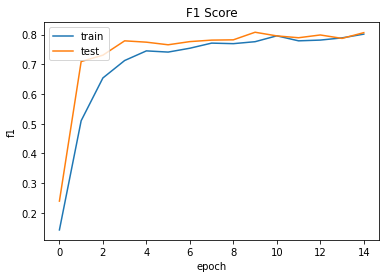

In [45]:
plt.plot(history.history['f1_m'])
plt.plot(history.history['val_f1_m'])
plt.title('F1 Score')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

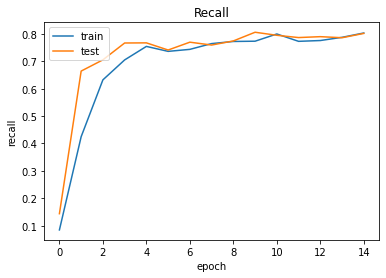

In [46]:
plt.plot(history.history['recall_m'])
plt.plot(history.history['val_recall_m'])
plt.title('Recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
test_eval = model.evaluate(test, verbose=1)
print('El modelo predice el ', test_eval[1]*100,'% de los datos')

142/142 [==============================] - 21s 144ms/step
El modelo predice el  81.1245858669281 % de los datos
